# Player Performance Analysis of  IPL 2025 Season

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

In [20]:
deliveries = pd.read_csv(r"C:\Users\KHOWSIK\Documents\sports data\player performance and fan engagement analysis\player performance\ipl_2025_deliveries.csv")
orange_cap = pd.read_csv(r"C:\Users\KHOWSIK\Documents\sports data\player performance and fan engagement analysis\player performance\orange_cap.csv")
purple_cap = pd.read_csv(r"C:\Users\KHOWSIK\Documents\sports data\player performance and fan engagement analysis\player performance\purple_cap.csv")


In [21]:
deliveries.head(), deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17246 entries, 0 to 17245
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             17246 non-null  int64  
 1   season               17246 non-null  int64  
 2   phase                17246 non-null  object 
 3   match_no             17246 non-null  int64  
 4   date                 17246 non-null  object 
 5   venue                17246 non-null  object 
 6   batting_team         17246 non-null  object 
 7   bowling_team         17246 non-null  object 
 8   innings              17246 non-null  int64  
 9   over                 17246 non-null  float64
 10  striker              17246 non-null  object 
 11  bowler               17246 non-null  object 
 12  runs_of_bat          17246 non-null  int64  
 13  extras               17246 non-null  int64  
 14  wide                 17246 non-null  int64  
 15  legbyes              17246 non-null 

(   match_id  season        phase  match_no          date  \
 0    202501    2025  Group Stage         1  Mar 22, 2025   
 1    202501    2025  Group Stage         1  Mar 22, 2025   
 2    202501    2025  Group Stage         1  Mar 22, 2025   
 3    202501    2025  Group Stage         1  Mar 22, 2025   
 4    202501    2025  Group Stage         1  Mar 22, 2025   
 
                    venue batting_team bowling_team  innings  over  ...  \
 0  Eden Gardens, Kolkata          KKR          RCB        1   0.1  ...   
 1  Eden Gardens, Kolkata          KKR          RCB        1   0.2  ...   
 2  Eden Gardens, Kolkata          KKR          RCB        1   0.3  ...   
 3  Eden Gardens, Kolkata          KKR          RCB        1   0.4  ...   
 4  Eden Gardens, Kolkata          KKR          RCB        1   0.5  ...   
 
   runs_of_bat extras  wide  legbyes  byes  noballs  wicket_type  \
 0           0      0     0        0     0        0          NaN   
 1           4      0     0        0     0  

In [22]:
batting_stats = deliveries.groupby('striker').agg(
    runs=('runs_of_bat', 'sum'),
    balls=('over', 'count'),
    fours=('runs_of_bat', lambda x: (x == 4).sum()),
    sixes=('runs_of_bat', lambda x: (x == 6).sum()),
    dismissals=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['balls']) * 100
batting_stats['avg'] = batting_stats['runs'] / batting_stats['dismissals'].replace(0, np.nan)


In [23]:
top_batters = batting_stats[
    (batting_stats['runs'] > 300) & (batting_stats['strike_rate'] > 140)
]

underperformers = batting_stats[
    (batting_stats['runs'] < 150) & (batting_stats['strike_rate'] < 110)
]

top_batters[['striker','runs','strike_rate']]


,striker,runs,strike_rate
2,Abhishek Sharma,439,181.404959
3,Abishek Porel,301,144.019139
28,Buttler,538,159.643917
35,Dhruv Jurel,333,152.054795
50,Head,374,151.417004
53,Ishan Kishan,354,144.489796
56,Jaiswal,559,156.145251
68,Klaasen,487,166.211604
69,Kohli,657,140.987124
79,Markram,445,145.424837


In [24]:
bowling_stats = deliveries.groupby('bowler').agg(
    balls=('over', 'count'),
    runs_conceded=('total runs conceded', 'sum'),
    wickets=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

bowling_stats['economy'] = (bowling_stats['runs_conceded'] / bowling_stats['balls']) * 6
bowling_stats['strike_rate'] = bowling_stats['balls'] / bowling_stats['wickets'].replace(0, np.nan)


In [25]:
batting_stats['BCI'] = (
    (batting_stats['runs'] * 0.5) +
    (batting_stats['strike_rate'] * 0.3) +
    ((batting_stats['fours'] + batting_stats['sixes']*2) * 0.2)
)

batting_stats.sort_values(by='BCI', ascending=False).head(10)


,striker,runs,balls,fours,sixes,dismissals,strike_rate,avg,BCI
125,Sai Sudharsan,759,509,88,21,14,149.115914,54.214286,450.234774
149,Suryakumar Yadav,717,439,69,38,11,163.325740,65.181818,436.497722
143,Shubman Gill,650,432,62,24,12,150.462963,54.166667,392.138889
69,Kohli,657,466,66,19,13,140.987124,50.538462,391.596137
83,Mitchell Marsh,627,400,56,37,13,156.750000,48.230769,386.525000
141,Shreyas Iyer,604,359,43,39,12,168.245125,50.333333,376.673538
104,Prabhsimran,599,376,63,30,17,159.308511,35.235294,371.892553
106,Priyansh Arya,545,310,60,31,18,175.806452,30.277778,349.641935
56,Jaiswal,559,358,60,28,13,156.145251,43.000000,349.543575
102,Pooran,524,288,45,40,11,181.944444,47.636364,341.583333


In [16]:
bowling_stats['BoCI'] = (
    (bowling_stats['wickets'] * 0.5) -
    (bowling_stats['economy'] * 0.3) +
    ((1 / bowling_stats['strike_rate']) * 0.2)
)

bowling_stats.sort_values(by='BoCI', ascending=False).head(10)


,bowler,balls,runs_conceded,wickets,economy,strike_rate,BoCI
79,Prasidh,364,477,26,7.862637,14.000000,10.655495
76,Noor Ahmad,314,386,24,7.375796,13.083333,9.802548
17,Boult,357,502,23,8.436975,15.521739,8.981793
8,Arshdeep Singh,367,496,22,8.108992,16.681818,8.579292
18,Bumrah,289,311,21,6.456747,13.761905,8.577509
35,Hazlewood,270,380,22,8.444444,12.272727,8.482963
90,Sai Kishore,262,386,19,8.839695,13.789474,6.862595
116,Vaibhav Arora,270,413,19,9.177778,14.210526,6.760741
59,Mitchell Starc,245,376,19,9.208163,12.894737,6.753061
117,Varun Chakaravarthy,308,375,17,7.305195,18.117647,6.319481


In [26]:
pressure_overs = deliveries[
    (deliveries['over'] >= 16) &
    (deliveries['innings'] <= 2)
]


In [ ]:
pressure_batting = pressure_overs.groupby('striker').agg(
    pressure_runs=('runs_of_bat', 'sum'),
    pressure_balls=('over', 'count')
).reset_index()

# Calculate Pressure Strike Rate
pressure_batting['pressure_sr'] = (
    pressure_batting['pressure_runs'] /
    pressure_batting['pressure_balls']
) * 100

# ✅ Apply Conditions:
# Pressure Runs > 20
# Balls Faced >= 5
pressure_batting_filtered = pressure_batting[
    (pressure_batting['pressure_runs'] > 20) &
    (pressure_batting['pressure_balls'] >= 5)
]

# Sort by Strike Rate
pressure_batting_filtered.sort_values(
    by='pressure_sr', ascending=False
).head(10)


,striker,pressure_runs,pressure_balls,pressure_sr
90,Ravindra,21,6,350.000000
108,Shepherd,70,24,291.666667
127,Venkatesh Iyer,42,15,280.000000
116,Stoinis,100,38,263.157895
18,Brevis,42,16,262.500000
57,Livingstone,37,15,246.666667
99,Sameer Rizvi,32,13,246.153846
110,Shreyas Iyer,149,63,236.507937
52,Klaasen,128,56,228.571429
25,Cummins,81,36,225.000000


In [36]:
match_runs = deliveries.groupby(['match_id','striker'])['runs_of_bat'].sum().reset_index()


In [35]:
deliveries.columns

Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder', 'total runs conceded'],
      dtype='object')

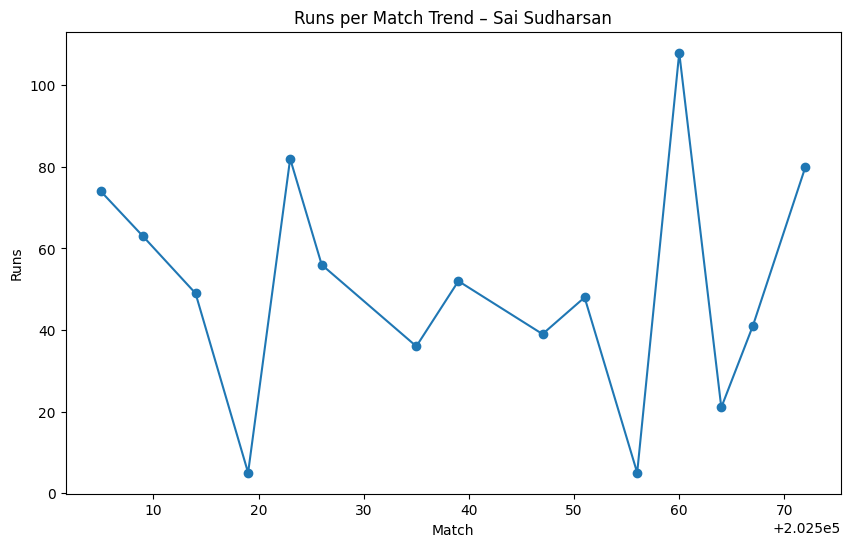

In [37]:
player = match_runs.groupby('striker')['runs_of_bat'].sum().idxmax()
player_data = match_runs[match_runs['striker'] == player]

plt.plot(player_data['match_id'], player_data['runs_of_bat'], marker='o')
plt.title(f"Runs per Match Trend – {player}")
plt.xlabel("Match")
plt.ylabel("Runs")
plt.show()
